In [6]:
!pip install geopandas

     |████████████████████████████████| 921kB 8.7MB/s 
     |████████████████████████████████| 10.1MB 17.7MB/s 
     |████████████████████████████████| 11.8MB 30.0MB/s 


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [0]:
data = pd.read_csv("train.csv")

Remove unreasonable coordinates

In [32]:
data["X"].min()

-122.51364206429

In [33]:
data["X"].max()

-120.5

In [34]:
data["Y"].min()

37.7078790224135

In [37]:
data["Y"].max()

37.819975492297004

In [0]:
data = data[data["Y"] <= 40]

In [0]:
data = data.sample(n=1000)

In [0]:
data["points"] = data.apply(lambda row: Point(row["X"], row["Y"]), axis=1)

In [41]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,points
639742,2006-04-18 15:49:00,DRUG/NARCOTIC,SALE OF MARIJUANA,Tuesday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411071,37.781751,POINT (-122.411071423064 37.7817511307229)
87690,2014-03-17 17:31:00,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Monday,PARK,"ARREST, BOOKED",800 Block of BUENAVISTAWEST AV,-122.442598,37.769312,POINT (-122.442597549743 37.7693116425317)
653486,2006-02-07 15:00:00,VANDALISM,"MALICIOUS MISCHIEF, GRAFFITI",Tuesday,PARK,NONE,1200 Block of MASONIC AV,-122.445182,37.769736,POINT (-122.445181952651 37.76973596241511)
325021,2010-11-16 16:14:00,DRUG/NARCOTIC,POSSESSION OF CONTROLLED SUBSTANCE FOR SALE,Tuesday,INGLESIDE,"ARREST, BOOKED",100 Block of HIGHLAND AV,-122.423541,37.737435,POINT (-122.42354064042 37.7374351380346)
439938,2009-03-05 15:00:00,NON-CRIMINAL,FOUND PROPERTY,Thursday,TENDERLOIN,NONE,300 Block of EDDY ST,-122.412931,37.783834,POINT (-122.412930522059 37.7838344374141)


In [0]:
geo_data = gpd.GeoDataFrame(data, geometry="points")
geo_data.crs = {"init": "epsg:4326"}

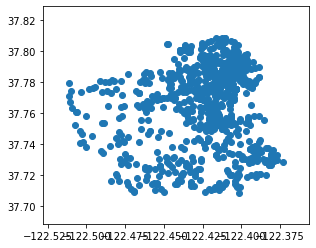

In [51]:
geo_data.plot()
plt.show()

Police Department Districts

In [45]:
data["PdDistrict"].unique()

array(['SOUTHERN', 'PARK', 'INGLESIDE', 'TENDERLOIN', 'MISSION',
       'CENTRAL', 'TARAVAL', 'NORTHERN', 'BAYVIEW', 'RICHMOND'],
      dtype=object)

In [0]:
sfpd = gpd.read_file("current_police_districts.geojson")

In [47]:
sfpd.head()

,shape_area,shape_leng,company,shape_le_1,district,geometry
0,91344142.1925,87550.2751419,B,100231.353916,SOUTHERN,"MULTIPOLYGON (((-122.39186 37.79425, -122.3917..."
1,201384622.317,163013.798332,C,144143.480351,BAYVIEW,"MULTIPOLYGON (((-122.38098 37.76480, -122.3810..."
2,80623839.7922,40152.783389,D,40518.8342346,MISSION,"MULTIPOLYGON (((-122.40954 37.76932, -122.4086..."
3,82781685.5603,56493.858208,E,50608.3103205,NORTHERN,"MULTIPOLYGON (((-122.43379 37.80793, -122.4337..."
4,11072154.5623,12424.2689691,J,18796.7841847,TENDERLOIN,"MULTIPOLYGON (((-122.40217 37.78626, -122.4171..."


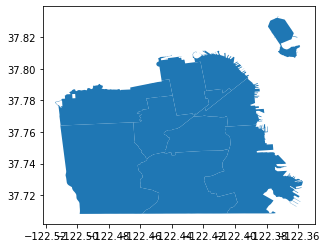

In [50]:
sfpd.plot()
plt.show()

In [0]:
sf_map = sf.plot(ax=ax, color='gray')
geo_police_data.plot(ax=sf_map, marker="o", mfc="red", markersize=8, markeredgecolor="black", alpha=0.3)
ax.set_title("San Francisco incidents of crime")
plt.show()

References:


*   https://data.sfgov.org/Public-Safety/Current-Police-Districts/wkhw-cjsf

